<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/HA_LMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

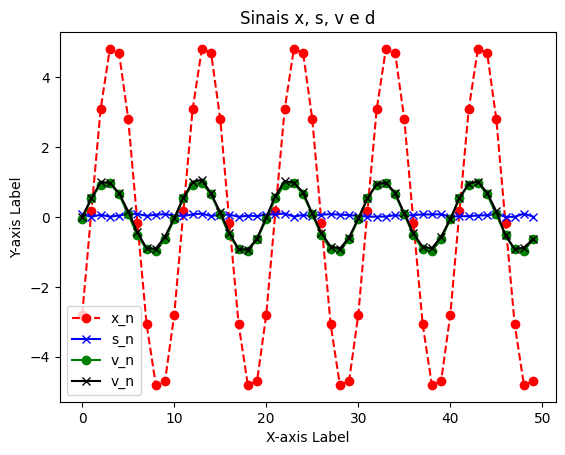

In [44]:
"""
PSI589 - Fundamentos de Adaptação e Aprendizado de Máquina
Aluno: Heitor Albuquerque
Exercício Algoritmo LMS
"""

import numpy as np
import matplotlib.pyplot as plt

"""
# M : numero de coeficientes
M = 2

# Matriz R
# R_xx(k) = 25/2 * cos*(2*pi*k/10)

# Vetor R_xx
R_xx = np.zeros(M)
R_xx = R_xx.reshape(1,-1)
print("R_xx é: \n", R_xx)

for index in range (M):
  R_xx[1, index] = (25/2)*np.cos(2*np.pi*index/10)

print("R_xx é: \n", R_xx)
"""

N = 500
var_s = 0.01

n = np.arange(N)
n = n.reshape(-1,1)

# phi_x é fase aleatória inicial
phi_x = np.random.rand(1,1)*2*np.pi

# 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
x_n = 5*np.sin(2*np.pi*n/10+phi_x)
x_n = x_n.reshape(-1,1)

# 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
v_n = np.sin(2*np.pi*n/10+np.pi/6+phi_x)
v_n = v_n.reshape(-1,1)

# s : ruido gaussinao com 𝜎^2=0,01
s_n = np.random.rand(N)*np.sqrt(var_s)
s_n = s_n.reshape(-1,1)

# d: desired signal
# d = s_n + v_n
d_n = s_n + v_n

plt.plot(n[:50], x_n[:50], color='red', linestyle='--', marker='o', label='x_n')
plt.plot(n[:50], s_n[:50], color='blue', linestyle='-', marker='x', label='s_n')
plt.plot(n[:50], v_n[:50], color='green', linestyle='-', marker='o', label='v_n')
plt.plot(n[:50], d_n[:50], color='black', linestyle='-', marker='x', label='v_n')

plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Sinais x, s, v e d")
plt.legend()
plt.show() # Displays the plot


In [45]:
# gerar função de wiener

def Wiener_HA(x: np.ndarray, d: np.ndarray, M: int):
  R = np.zeros((M,M))
  p = np.zeros(M)
  p = p.reshape(-1,1)

  x_M = np.zeros(M)
  x_M = x_M.reshape(-1,1)

  # numero de amostras
  N = x.shape[0]

  for index_W in range (N):
      # vetor x dentro do loop

      x_M[1:M] = x_M[0:M-1]
      x_M[0] = x[index_W]

#      print("Valores de x_M \n", x_M)

      # Tamanho de R (Nx1) (1xN) = NxN
      R = R + x_M@x_M.T

#      print("Valores de R \n", R)
      p = p + x_M * d[index_W]

#      print("Valores de p \n", p)

  R = R/N
  p = p/N

  # 𝐰o=𝐑−1𝐩

  w_o = np.linalg.solve(R, p)

  return w_o, R, p



In [54]:
"""
  Exercício
  Fazer o cálculo para M = 2 N  = 500

 """
 # os vetores x_n e d_n já haviam sido previamente criados com N = 500

M=2

w_o, R, p = Wiener_HA(x_n, d_n, M)

print("\nValores de R\n", R)
print("\nValores de p\n", p)
print("\nValores de wo\n", w_o)

# R teorico
R_t = [[25/2, (25/2)*np.cos(2*np.pi/10)], [(25/2)*np.cos(2*np.pi/10), 25/2]]
print("\nValores de R teorico\n", R_t)

# p teorico
p_t = [[25/2, (25/2)*np.cos(2*np.pi/10+np.pi/6)]]
print("\nValores de p teorico\n", p_t)


Valores de R
 [[12.5        10.08639132]
 [10.08639132 12.45581736]]

Valores de p
 [[2.16076758]
 [1.01760978]]

Valores de wo
 [[ 0.30855017]
 [-0.16815821]]

Valores de R teorico
 [[12.5, np.float64(10.112712429686843)], [np.float64(10.112712429686843), 12.5]]

Valores de p teorico
 [[12.5, np.float64(5.084208038447505)]]


In [47]:
# Calculo da variância de d

# obtemos a média de d
mhu = np.sum(d_n)/(N-1)

# calculo do desvio de d
sigma_d = d_n - mhu

# calculo da variancia de d
var_d = np.sum(sigma_d ** 2)/(N-1)

# Jmin
Jmin = var_d - p.T @ w_o

print("\nJmin = ", Jmin)
print("\nVar_s = ", var_s)


Jmin =  [[0.00335564]]

Var_s =  0.01



Dimensoes de h (2, 1)

Valores dos indices da exponencial 
 [[0]
 [1]]

Dimensoes de w_ (512, 1)

Dimensoes de H (1, 512)

Dimensoes de fase (1, 512)

Dimensoes de magnitude (1, 512)
Dimensoes de H (1, 512)

O valor de k em 2pi/10 é  102

O valor de fase em 2pi/10 é  [0.55802199]

O valor de magnitude em 2pi/10 é  [0.30154516]


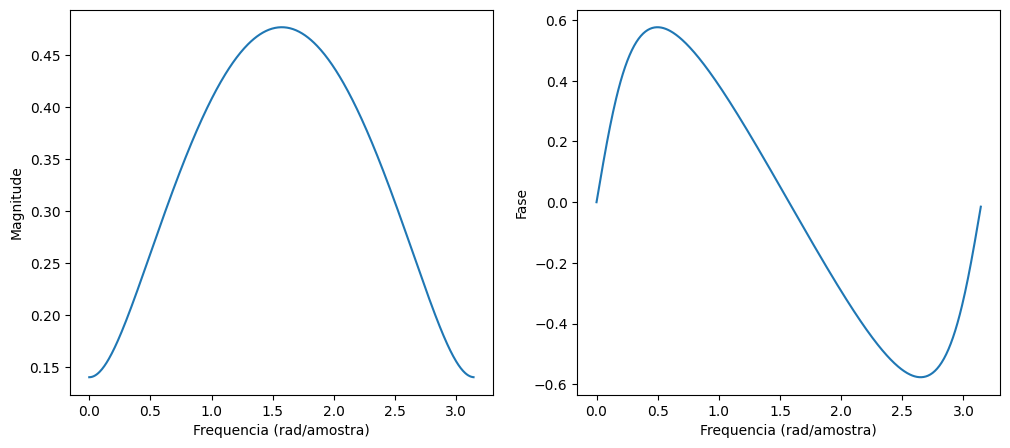

In [48]:
"""

Resposta em frequencia do filtor é obtida pelos coeficientes do filtro(w_o) multiplicados por e^(jwt)

Para avaliar na frequência de interferência basta substituir w por w_interf

w_interf = 2*np.pi/10

"""
h = np.array([w_o[0], w_o[1]])
print("\nDimensoes de h", h.shape)

k_exp = np.arange(M)
k_exp = k_exp.reshape(-1,1)
print("\nValores dos indices da exponencial \n", k_exp)

w_ = np.linspace(0,np.pi,512)
w_ = w_.reshape(-1,1)
#e_jw = np.exp(-2*np.pi*k_exp/10)
#print("\nValores does coeficientes da exponencial \n", e_jw)
print("\nDimensoes de w_", w_.shape)

# Resposta em frequência H(jw)

# H_jw = np.dot(w_o.T , e_jw)
H = np.fft.fft(h.T,512)
#print("\nEsses são os valores da resposta em frequência H(jw)\n", H_jw)
print("\nDimensoes de H", H.shape)

# phase = np.angle(H_jw)
phase = np.angle(H)
#print("\nO valor de phase é: \n", phase)
print("\nDimensoes de fase", phase.shape)



#magnitude = np.abs(H_jw)
magnitude = np.abs(H)
#print("\nO valor de magnitude é: ", magnitude)
print("\nDimensoes de magnitude", magnitude.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(w_,magnitude.T)
plt.xlabel("Frequencia (rad/amostra)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(w_,phase.T)
plt.xlabel("Frequencia (rad/amostra)")
plt.ylabel("Fase")

print("Dimensoes de H", H.shape)


# para a frequencia angular de 2*pi/10 obtemos a magnitude e phase
k_wo = int(512*(np.pi/5)/(np.pi))

print("\nO valor de k em 2pi/10 é ", k_wo)

phase_kwo = phase.T[k_wo]
print("\nO valor de fase em 2pi/10 é ", phase_kwo)

magnitude_kwo = magnitude.T[k_wo]
print("\nO valor de magnitude em 2pi/10 é ", magnitude_kwo)


